# A Food Analysis


**This data was collected via the script Food.py from the https://ndb.nal.usda.gov/ndb/
database.**


## 1. Inspection

In [2]:
import pandas as pd 
import numpy as np

In [3]:
raw_dat = pd.read_csv('nutrition.csv',sep=';',index_col=0)

In [4]:
raw_dat.head()

,Energy100g,Sugar100g,Fat100g,Carb100g,Weight_gram
Name,,,,,
Acerolajuiceraw,23.0,4.50,0.3,4.80,242.0
Acerolawestindiancherryraw,32.0,4.50,0.3,7.69,98.0
Alcoholicbeveragebeerlight,29.0,0.09,0.0,1.64,29.5
AlcoholicbeveragebeerlightBUDLIGHT,29.0,0.09,0.0,1.30,29.5
AlcoholicbeveragebeerlightBUDWEISERSELECT,28.0,0.09,0.0,0.87,29.5


In [5]:
raw_dat.describe()

,Energy100g,Sugar100g,Fat100g,Carb100g,Weight_gram
count,7523.000000,7523.000000,7523.000000,7523.000000,7523.000000
mean,221.216935,7.427001,10.742684,19.726933,99.800711
std,167.906785,14.290778,16.237749,25.761721,82.583428
min,0.000000,0.000000,0.000000,0.000000,0.100000
25%,93.000000,0.000000,0.850000,0.000000,29.600000
50%,186.000000,1.600000,5.290000,7.690000,85.000000
75%,318.000000,7.600000,13.725000,27.650000,130.500000
max,902.000000,99.800000,100.000000,100.000000,1184.000000


## 2. Visualisation and Correlation

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

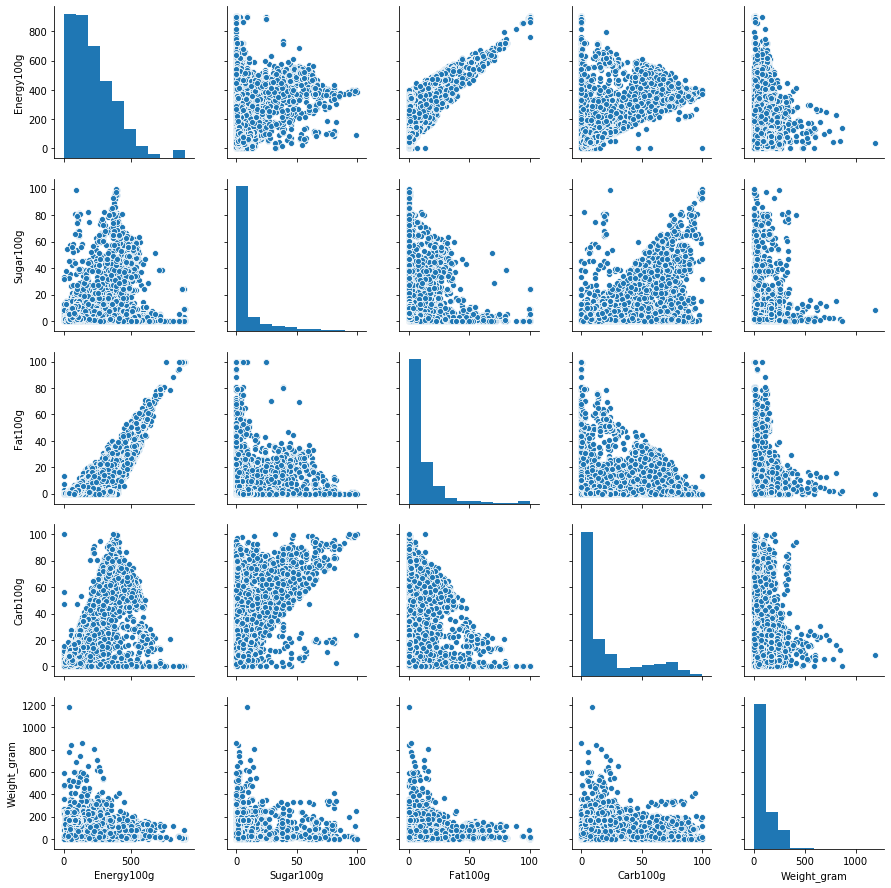

In [7]:
sns.pairplot(raw_dat)
plt.show()

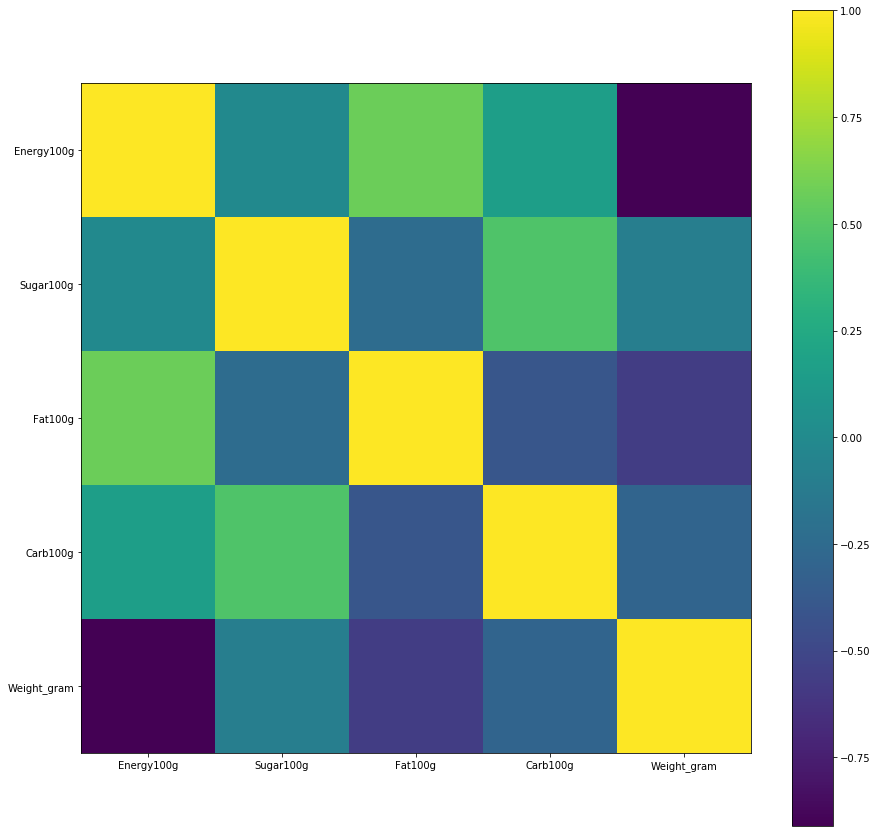

In [8]:
# Inspecting the correlation
from sklearn.preprocessing import normalize
fig,ax = plt.subplots(figsize=(15,15))
mat = ax.imshow(pd.DataFrame(normalize(raw_dat)).corr())
plt.xticks(range(0,len(raw_dat.columns)),list(raw_dat.columns))
plt.yticks(range(0,len(raw_dat.columns)),list(raw_dat.columns))
plt.colorbar(mat)
plt.show()

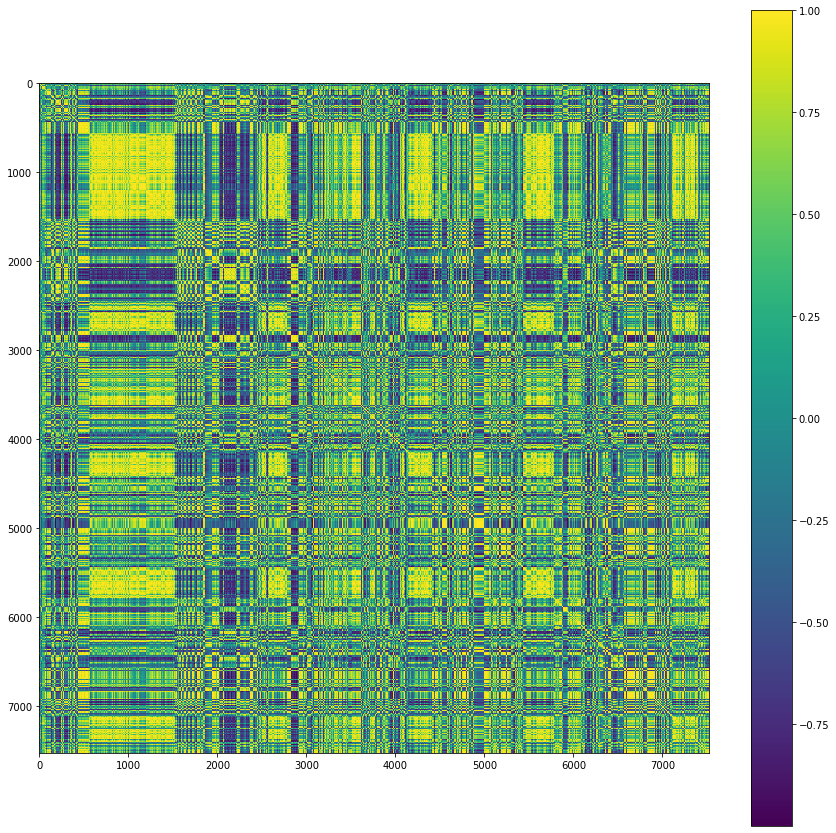

In [9]:
# Many foods are the same labelling, hence the correlation
fig,ax = plt.subplots(figsize=(15,15))
mat = ax.imshow(pd.DataFrame(normalize(raw_dat.T)).corr())
plt.colorbar(mat)
plt.show()

## 3. Prediction

In [27]:
# Predicting the amount of energy directly from fat content, is it possible?
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler

# Here we select a linear model with L2 penalizer 
model = Ridge()

# Split data
X_train, X_test, y_train, y_test = train_test_split(raw_dat['Fat100g'].values.reshape(-1,1),raw_dat['Energy100g'],test_size=0.33)

# Run with cross validation 
alphas = np.linspace(.00001, 2, 1)
model = RidgeCV(alphas = alphas, cv =5, normalize = True)
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

# Result
from sklearn.metrics import r2_score, mean_squared_error
print("MSE: ",mean_squared_error(y_test,y_pred))
print("R2 SCORE: ",r2_score(y_test,y_pred))

MSE:  9284.176118834494
R2 SCORE:  0.6601415930367531


## 4. Results

In [28]:
# Summary for predicting Energy from Fat alone. 
from regressors import stats    
print(stats.summary(model, X_train, y_train))

Residuals:
      Min       1Q   Median       3Q       Max
-268.6517 -24.1763  27.5178  63.2876  241.4177


Coefficients:
              Estimate  Std. Error   t value  p value
_intercept  129.348345    1.594227   81.1355      0.0
x1            8.490099    0.068529  123.8914      0.0
---
R-squared:  0.68741,    Adjusted R-squared:  0.68734
F-statistic: 11078.79 on 1 features
None


## 5. Conclusion

**Fat remains a good estimate for predicting how much energy is in a selected model. However, due to the low R2 value, fat does not describe the complete energy profile. What this data tells us, "where there is more fat, there is more energy present." A simple one feature linear regression determines the overall trend (+a * fat = energy).**